# Linear Algebra (`scipy.linalg`)

In [1]:
import numpy as np
A = np.mat('[1 2;3 4]')
A

matrix([[1, 2],
        [3, 4]])

In [2]:
A.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [3]:
b = np.mat('[5 6]')
b

matrix([[5, 6]])

In [4]:
b.T

matrix([[5],
        [6]])

In [5]:
A*b.T

matrix([[17],
        [39]])

In [6]:
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [7]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [8]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [9]:
b.T

array([[5],
       [6]])

In [10]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [11]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [12]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [13]:
b.T  #not matrix transpose!

array([5, 6])

In [14]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

In [15]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [16]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [17]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [18]:
A = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])

In [19]:
linalg.inv(A).dot(b)  # slow

array([[-4. ],
       [ 4.5]])

In [20]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[0.],
       [0.]])

In [21]:
np.linalg.solve(A, b)  # fast

array([[-4. ],
       [ 4.5]])

In [22]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[0.],
       [0.]])

In [23]:
linalg.det(A)

-2.0

In [24]:
linalg.norm(A)

5.477225575051661

In [25]:
linalg.norm(A,'fro') # frobenius norm is the default

5.477225575051661

In [26]:
linalg.norm(A,1) # L1 norm (max column sum)

6.0

In [27]:
linalg.norm(A,-1)

4.0

In [28]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

7.0

In [29]:
import matplotlib.pyplot as plt

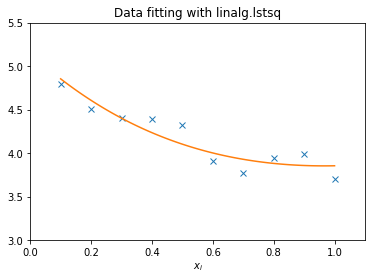

In [30]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [31]:
A = np.array([[1, 2], [3, 4]])
la, v = linalg.eig(A)
l1, l2 = la
print(l1, l2)   # eigenvalues
print(v[:, 0])   # first eigenvector
print(v[:, 1])   # second eigenvector
print(np.sum(abs(v**2), axis=0))  # eigenvectors are unitary
v1 = np.array(v[:, 0]).T
print(linalg.norm(A.dot(v1) - l1*v1))  # check the computation

(-0.3722813232690143+0j) (5.372281323269014+0j)
[-0.82456484  0.56576746]
[-0.41597356 -0.90937671]
[1. 1.]
5.551115123125783e-17


In [32]:
A = np.array([[1,2,3],[4,5,6]])
M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)
U, Vh = U, Vh
print(U)
print(Sig)
print(Vh)
U.dot(Sig.dot(Vh)) #check computation

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


array([[1., 2., 3.],
       [4., 5., 6.]])

In [34]:
A = np.mat('[1 3 2; 1 4 5; 2 3 6]')
T, Z = linalg.schur(A)
T1, Z1 = linalg.schur(A, 'complex')
T2, Z2 = linalg.rsf2csf(T, Z)

In [35]:
print(T)

[[ 9.90012467  1.78947961 -0.65498528]
 [ 0.          0.54993766 -1.57754789]
 [ 0.          0.51260928  0.54993766]]


In [36]:
print(T2)

[[ 9.90012467+0.00000000e+00j -0.32436598+1.55463542e+00j
  -0.88619748+5.69027615e-01j]
 [ 0.        +0.00000000e+00j  0.54993766+8.99258408e-01j
   1.06493862+3.05311332e-16j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.54993766-8.99258408e-01j]]


In [37]:
print(abs(T1 - T2)) # different

[[3.58036167e-15 2.51185784e+00 7.82531358e-01]
 [0.00000000e+00 9.93013661e-16 1.07952048e+00]
 [0.00000000e+00 0.00000000e+00 9.93013661e-16]]


In [38]:
print(abs(Z1 - Z2)) # different

[[0.73085996 1.04062922 1.02381174]
 [1.26810177 0.52558735 1.28148298]
 [1.35021971 0.71190629 0.99407767]]


In [39]:
T, Z, T1, Z1, T2, Z2 = map(np.mat,(T,Z,T1,Z1,T2,Z2))
print(abs(A - Z*T*Z.H))  # same

[[1.77635684e-15 3.55271368e-15 4.88498131e-15]
 [2.22044605e-15 3.55271368e-15 6.21724894e-15]
 [2.22044605e-15 3.10862447e-15 7.99360578e-15]]


In [40]:
print(abs(A - Z1*T1*Z1.H))  # same

[[4.84730289e-16 5.33946871e-15 3.14851498e-15]
 [2.10650008e-15 1.15511223e-14 1.50994413e-14]
 [2.67377111e-15 1.06590445e-14 1.77635684e-14]]


In [41]:
print(abs(A - Z2*T2*Z2.H))  # same

[[1.99840144e-15 3.10881807e-15 4.88506016e-15]
 [2.88711358e-15 3.55314733e-15 5.33022688e-15]
 [2.22044605e-15 3.55314733e-15 7.10542736e-15]]


In [42]:
from scipy import special, random, linalg
np.random.seed(1234)
A = random.rand(3, 3)
B = linalg.funm(A, lambda x: special.jv(0, x))
print(A)
print(B)

[[0.19151945 0.62210877 0.43772774]
 [0.78535858 0.77997581 0.27259261]
 [0.27646426 0.80187218 0.95813935]]
[[ 0.86511146 -0.19676526 -0.13856748]
 [-0.17479869  0.7259118  -0.16606258]
 [-0.19212044 -0.32052767  0.73590704]]


In [43]:
linalg.eigvals(A)

array([ 1.7388151 +0.j, -0.20270676+0.j,  0.39352627+0.j])

In [44]:
special.jv(0, linalg.eigvals(A))

array([0.37551908+0.j, 0.98975384+0.j, 0.96165739+0.j])

In [45]:
linalg.eigvals(B)

array([0.37551908+0.j, 0.98975384+0.j, 0.96165739+0.j])